# Customer Churn Analysis & Retention Strategy – KKBox Subscription Service

## Executive Summary
This project analyzes customer churn behavior in a subscription-based music streaming service using the **KKBox Churn Prediction Challenge** dataset. The objective is to identify key churn drivers, build a predictive model, and propose actionable retention strategies to support data-driven business decisions.

**Key highlights of this analysis:**
- **Objective:**  
  To identify the main factors associated with customer churn, evaluate the impact of discounts and regional differences, and build a churn prediction model to support retention initiatives.
- **Dataset:**  
  The analysis utilizes multiple datasets from KKBox, including customer demographics (`members`), transaction and subscription history (`transactions`), user activity logs (`user_logs`), and churn labels (`train`).
- **Methodology:**  
  The study combines exploratory data analysis (EDA), statistical testing, feature engineering, and supervised machine learning models (Logistic Regression and tree-based models) to analyze churn behavior.
- **Key Findings:**  
  Customer churn is strongly associated with declining user activity, short subscription tenure, frequent use of high discounts, and specific payment behaviors. Certain regions also exhibit consistently higher churn rates.
- **Modeling Approach:**  
  A churn prediction model was developed and evaluated using business-relevant metrics such as ROC-AUC and recall, prioritizing the identification of high-risk churn customers.
- **Business Recommendations:**  
  Based on churn drivers and risk segmentation, targeted retention strategies are proposed, including early warning systems, behavior-based incentives, and region-specific campaigns to reduce customer attrition.

## Business Problem & Objectives
### Business Context
- KKBox operates as a **subscription-based music streaming service**, where revenue is primarily driven by recurring subscription payments. In this business model, **customer churn directly impacts recurring revenue, customer lifetime value, and long-term business sustainability**.
- Customer churn represents users who fail to renew their subscriptions within a defined period. Even a small increase in churn rate can lead to significant revenue loss, making churn prevention a critical business priority. Compared to acquiring new customers, retaining existing customers is generally more cost-effective and yields higher returns.
- Therefore, the ability to **identify early signs of churn and understand the underlying drivers** is essential for designing effective retention strategies and optimizing marketing and promotional efforts.
### Business Objectives
1. **Identify the key factors associated with customer churn**  
   Analyze customer demographics, subscription patterns, payment behavior, discounts, and usage activity to determine which factors are most strongly related to churn.
2. **Evaluate the impact of discounts and regional differences on churn behavior**  
   Assess whether discount strategies and geographic regions influence churn rates differently, and identify potential high-risk segments.
3. **Develop a predictive churn model**  
   Build and evaluate a machine learning model to predict the probability of customer churn, enabling early identification of high-risk customers.
4. **Propose data-driven retention strategies**  
   Translate analytical insights and model outputs into actionable retention strategies that can help reduce churn and improve customer lifetime value.

## Data Overview
This project uses multiple datasets from the **KKBox Churn Prediction Challenge**, which together provide information on customer churn status, transaction history, user listening behavior, and member demographics.
### Target Dataset
#### `train.csv`
The training dataset containing user identifiers and churn labels.

| Column | Description |
|------|------------|
| `msno` | Unique user identifier |
| `is_churn` | Target variable indicating churn status. A value of `1` means the user did not renew their subscription within 30 days after expiration, while `0` indicates renewal |

#### `train_v2.csv`
An updated version of `train.csv`, refreshed on **11/06/2017**, containing churn labels for **March 2017**.  
This dataset can be used for model validation or temporal comparison.

---

### 3.2 Test Dataset

#### `sample_submission_zero.csv`
The test dataset containing user identifiers in the expected submission format.

| Column | Description |
|------|------------|
| `msno` | Unique user identifier |
| `is_churn` | Churn prediction to be generated by the model |

#### `sample_submission_v2.csv`
An updated version of the test dataset, refreshed on **11/06/2017**, containing user data for **April 2017**.

---

### 3.3 Transaction Data

#### `transactions.csv`
Contains detailed transaction records for users up to **February 28, 2017**.

| Column | Description |
|------|------------|
| `msno` | Unique user identifier |
| `payment_method_id` | Payment method used |
| `payment_plan_days` | Length of the subscription plan (days) |
| `plan_list_price` | Listed price of the plan (NTD) |
| `actual_amount_paid` | Amount actually paid by the user (NTD) |
| `is_auto_renew` | Indicates whether auto-renewal is enabled |
| `transaction_date` | Date of transaction (`YYYYMMDD`) |
| `membership_expire_date` | Subscription expiration date (`YYYYMMDD`) |
| `is_cancel` | Indicates whether the user canceled the subscription in this transaction |

#### `transactions_v2.csv`
An updated version of `transactions.csv`, refreshed on **11/06/2017**, containing transaction data up to **March 31, 2017**.

---

### 3.4 User Activity Logs

#### `user_logs.csv`
Daily user activity logs describing listening behavior up to **February 28, 2017**.

| Column | Description |
|------|------------|
| `msno` | Unique user identifier |
| `date` | Activity date (`YYYYMMDD`) |
| `num_25` | Number of songs played less than 25% of total length |
| `num_50` | Number of songs played between 25% and 50% |
| `num_75` | Number of songs played between 50% and 75% |
| `num_985` | Number of songs played between 75% and 98.5% |
| `num_100` | Number of songs played more than 98.5% |
| `num_unq` | Number of unique songs played |
| `total_secs` | Total listening time (seconds) |

#### `user_logs_v2.csv`
An updated version of `user_logs.csv`, refreshed on **11/06/2017**, containing user activity data up to **March 31, 2017**.

---

### 3.5 Member Information

#### `members.csv`
Contains demographic and registration information for users.  
Note that **not all users in the dataset have corresponding member information**.

| Column | Description |
|------|------------|
| `msno` | Unique user identifier |
| `city` | City code |
| `bd` | Age. Contains extreme outliers (e.g., -7000 to 2015) and requires data cleaning |
| `gender` | User gender |
| `registered_via` | Registration method |
| `registration_init_time` | Registration date (`YYYYMMDD`) |
| `expiration_date` | Snapshot expiration date at the time of data extraction (not actual churn indicator) |

#### `members_v3.csv`
A refreshed version released on **11/13/2017**, where the `expiration_date` column has been removed to avoid confusion with actual churn behavior.

Before proceeding to data preparation and feature engineering, several important considerations regarding the dataset must be highlighted to ensure correct interpretation and valid analysis results.

- **Churn labels are available only in the training datasets**  
  The churn indicator (`is_churn`) is provided exclusively in `train.csv` and `train_v2.csv`.  
  All other datasets (transactions, user logs, and member information) do not contain churn labels and are used solely for feature construction.

- **`expiration_date` in `members.csv` does not represent churn behavior**  
  The `expiration_date` column in `members.csv` reflects a snapshot of membership status at the time of data extraction.  
  It should **not** be interpreted as an indicator of actual churn, as churn is explicitly defined based on subscription renewal behavior within 30 days after expiration and is only captured in the training labels.  
  For this reason, the refreshed `members_v3.csv`, which removes this column, is preferred to avoid misinterpretation.

- **The dataset is time-based and requires careful feature window selection**  
  All behavioral and transactional features must be constructed using information **prior to the churn observation period** to prevent data leakage.  
  Feature engineering will therefore respect appropriate time windows (e.g., recent activity trends, historical payment behavior) aligned with the churn definition period.

These considerations guide the data preparation process and ensure that the resulting analysis and predictive models remain both statistically valid and business-relevant.

## Data Preparation

### Data Loading

#### Import library

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Setup Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Fungsi Helper untuk Plotting Churn Rate
def plot_churn_rate(df, col, title, xlabel, rot=0, top_n=None):
    plt.figure(figsize=(10, 5))
    
    # Jika kategori banyak, ambil Top N berdasarkan populasi
    if top_n:
        top_cats = df[col].value_counts().nlargest(top_n).index
        plot_data = df[df[col].isin(top_cats)]
    else:
        plot_data = df

    # Barplot otomatis menghitung Mean (Churn Rate) jika y='is_churn'
    ax = sns.barplot(x=col, y='is_churn', data=plot_data, palette='viridis', errorbar=None)
    
    # Formatting
    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Churn Rate (Probability)', fontsize=12)
    plt.xticks(rotation=rot)
    
    # Tambahkan label angka di atas bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), textcoords = 'offset points')
    plt.show()

print("Fungsi visualisasi siap.")

Fungsi visualisasi siap.


In [7]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            pass

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#### Load Dataset

1. Load Data Train

In [8]:
# Load v1 dan v2
train_v1 = pd.read_csv('data_file/train.csv')
train_v2 = pd.read_csv('data_file/train_v2.csv')

# Append kedua dataset
train = pd.concat([train_v1, train_v2], axis=0, ignore_index=True)

# Hapus variabel lama
del train_v1, train_v2
gc.collect()

# Optimasi memori
train = reduce_mem_usage(train)
print(f"Shape Train Data: {train.shape}")
train.head()

Memory usage of dataframe is 29.97 MB
Memory usage after optimization is: 16.86 MB
Decreased by 43.7%
Shape Train Data: (1963891, 2)


,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


2. Load Data Members

In [9]:
members = pd.read_csv('data_file/members_v3.csv')

# Optimasi memori
members = reduce_mem_usage(members)
print(f"Shape Members Data: {members.shape}")
members.head()

Memory usage of dataframe is 309.88 MB
Memory usage after optimization is: 154.94 MB
Decreased by 50.0%
Shape Members Data: (6769473, 6)


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


3. Load Data Transactions

In [10]:
trans_v1 = pd.read_csv('data_file/transactions.csv')
trans_v2 = pd.read_csv('data_file/transactions_v2.csv')

# Append kedua dataset transaksi
transactions = pd.concat([trans_v1, trans_v2], axis=0, ignore_index=True)

# Urutkan berdasarkan user dan tanggal transaksi
transactions = transactions.sort_values(by=['msno', 'transaction_date'], ascending=[True, True])

del trans_v1, trans_v2
gc.collect()

transactions = reduce_mem_usage(transactions)
print(f"Shape Transactions Data: {transactions.shape}")
transactions.head()

Memory usage of dataframe is 1753.14 MB
Memory usage after optimization is: 723.17 MB
Decreased by 58.8%
Shape Transactions Data: (22978755, 9)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,35,7,0,0,0,20160909,20160914,0
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,38,410,1788,1788,0,20151121,20170104,0
21797460,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,22,395,1599,1599,0,20161023,20180206,0
1498592,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161116,20161215,0
17923235,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,20161215,20170115,0


4. Load User Logs

In [11]:
path_logs_v1 = "C:/kkbox compe/kkbox1/user_logs.csv"
path_logs_v2 = "C:/kkbox compe/kkbox1/user_logs_v2.csv"
logs_v2 = pd.read_csv(path_logs_v2)
logs_v2 = reduce_mem_usage(logs_v2)

# Untuk logs_v1 batasi hanya 10 juta baris saja
logs_v1 = pd.read_csv(path_logs_v1, nrows=10000000) 
logs_v1 = reduce_mem_usage(logs_v1)

user_logs = pd.concat([logs_v1, logs_v2], axis=0, ignore_index=True)

del logs_v1, logs_v2
gc.collect()

print(f"Shape User Logs: {user_logs.shape}")
user_logs.head()

Memory usage of dataframe is 1263.18 MB
Memory usage after optimization is: 526.32 MB
Decreased by 58.3%
Memory usage of dataframe is 686.65 MB
Memory usage after optimization is: 267.03 MB
Decreased by 61.1%
Shape User Logs: (28396362, 9)


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.334991
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.947998
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.955078
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.316406
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029297


5. Sanity Check Data Loaded

In [12]:
# Cek info dasar dari tabel utama
print("--- Info Train ---")
print(train.info())
print("\n--- Distribusi Target Churn ---")
print(train['is_churn'].value_counts(normalize=True))

print("\n--- Info Members ---")
print(members.info())

print("\n--- Info Transactions ---")
print(transactions.info())

--- Info Train ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963891 entries, 0 to 1963890
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   msno      object
 1   is_churn  int8  
dtypes: int8(1), object(1)
memory usage: 16.9+ MB
None

--- Distribusi Target Churn ---
is_churn
0    0.923213
1    0.076787
Name: proportion, dtype: float64

--- Info Members ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int8  
 2   bd                      int16 
 3   gender                  object
 4   registered_via          int8  
 5   registration_init_time  int32 
dtypes: int16(1), int32(1), int8(2), object(2)
memory usage: 154.9+ MB
None

--- Info Transactions ---
<class 'pandas.core.frame.DataFrame'>
Index: 22978755 entries, 6797850 to 9570304
Data columns (to

## Initial Insights from Data Sanity Check

An initial sanity check was performed after loading the datasets to understand their structure, scale, and potential analytical implications. Several important business-relevant insights can already be observed at this stage.

### Scale of the Dataset

The training dataset contains approximately **1.96 million users**, while the member information dataset includes over **6.7 million records**. This indicates that the analysis is conducted at a **large-scale, production-level data environment**, which closely resembles real-world subscription businesses.

Not all users in the training set have corresponding member information, suggesting that demographic data coverage is partial and should be treated as **supplementary rather than primary churn drivers**.

---

### Churn Distribution and Business Implications

The target variable (`is_churn`) shows a **highly imbalanced distribution**:

- **92.3%** of users renewed their subscriptions  
- **7.7%** of users churned

From a business perspective, this reflects a **typical subscription business pattern**, where the majority of users remain active while a smaller but critical segment contributes disproportionately to revenue loss.

This imbalance has two key implications:
- **Churn prediction models must prioritize recall for churned users**, as failing to identify high-risk customers can result in missed retention opportunities.
- Accuracy alone is not a meaningful performance metric; business-oriented metrics such as **ROC-AUC and churn recall** will be emphasized in model evaluation.

---

### Data Type Optimization and Performance Considerations

Key identifiers (`msno`) are stored as categorical variables, and churn labels are represented using compact integer types. This indicates an intentional effort to **optimize memory usage**, which is essential when working with datasets of this scale.

From an analytical standpoint, this also suggests that **efficient data processing and feature aggregation strategies** will be required, particularly when working with transaction histories and daily user activity logs.

---

### Early Risk Signals

Even before exploratory analysis, the observed churn rate of approximately **7–8%** highlights a meaningful opportunity for retention initiatives. In subscription-based businesses, reducing churn by even a small percentage can translate into **significant revenue preservation**, especially when applied to high-value or long-tenure customers.

These initial observations provide a strong foundation for subsequent feature engineering, exploratory analysis, and predictive modeling.


#### Data Cleaning

To ensure analytical validity and reliable model performance, data cleaning was conducted separately for each major dataset. The cleaning process focused on handling outliers, missing values, logical inconsistencies, and duplicate records.

1. Members Dataset Cleaning

In [13]:
# Handling Invalid Values pada 'bd' (Age)
# Ubah 0 dan outlier menjadi NaN
members['bd'] = members['bd'].apply(lambda x: x if 13 <= x <= 95 else np.nan)

# Isi NaN dengan Median (nilai tengah) agar data tidak hilang
median_age = members['bd'].median()
members['bd'] = members['bd'].fillna(median_age)
print(f"Outlier umur dibersihkan. NaN diisi dengan median: {median_age}")

# Handling Missing Values pada 'gender'
members['gender'] = members['gender'].astype('object') # Ubah ke object
members['gender'] = members['gender'].fillna('Unknown')
members['gender'] = members['gender'].astype('category') # Kembalikan ke category utk hemat memori

# Format Tanggal
# Convert ke datetime object.
members['registration_init_time'] = pd.to_datetime(members['registration_init_time'], format='%Y%m%d', errors='coerce')

# Pengecekan Duplikasi
# Pastikan 1 user ID (msno) hanya muncul 1 kali di tabel members.
dup_members = members.duplicated(subset=['msno']).sum()
if dup_members > 0:
    print(f"Ditemukan {dup_members} duplikat di members. Menghapus...")
    members = members.drop_duplicates(subset=['msno'], keep='first')
else:
    print("Tidak ada duplikasi di tabel members.")

print("\n--- Info Members Setelah Cleaning ---")
print(members.info())
print(members['bd'].describe())

Outlier umur dibersihkan. NaN diisi dengan median: 27.0
Tidak ada duplikasi di tabel members.

--- Info Members Setelah Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   city                    int8          
 2   bd                      float64       
 3   gender                  category      
 4   registered_via          int8          
 5   registration_init_time  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int8(2), object(1)
memory usage: 174.3+ MB
None
count    6.769473e+06
mean     2.781031e+01
std      6.085025e+00
min      1.300000e+01
25%      2.700000e+01
50%      2.700000e+01
75%      2.700000e+01
max      9.500000e+01
Name: bd, dtype: float64


The members dataset contains demographic and registration-related information, which serves as supplementary features for churn analysis.

#### Age (`bd`) Handling
The age variable (`bd`) contained extreme outliers, including invalid negative values and unrealistically large numbers. These values were treated as data quality issues rather than meaningful customer attributes.

- Invalid age values were removed and replaced with missing values.
- Missing ages were imputed using the **median age (27.0 years)** to preserve the central tendency while minimizing distortion from skewed distributions.

After cleaning, the age distribution became stable and business-reasonable, with:
- A minimum age of 13 years
- A maximum age of 95 years
- A strong concentration around the median age of 27

This approach ensures that age can be safely used as a demographic feature without introducing noise or bias into the analysis.

#### Duplicate Records
No duplicate records were found in the members dataset. This confirms that each user is uniquely represented and can be reliably joined with other datasets using the user identifier (`msno`).

---

2. Transactions Dataset Cleaning

In [14]:
# Format Tanggal Transaksi
# Convert integer date ke datetime
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d', errors='coerce')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], format='%Y%m%d', errors='coerce')

# Handling Invalid Values (Logical Consistency)
# Jika plan_list_price < 0 atau actual_amount_paid < 0
invalid_price = transactions[(transactions['plan_list_price'] < 0) | (transactions['actual_amount_paid'] < 0)]
print(f"Jumlah transaksi dengan nominal negatif: {len(invalid_price)}")

# Di sini kita hapus yang aneh (precaution)
transactions = transactions[(transactions['plan_list_price'] >= 0) & (transactions['actual_amount_paid'] >= 0)]

# Logical Check Tanggal
# Tanggal expire seharusnya tidak boleh lebih kecil dari tanggal transaksi (kecuali data error/koreksi)
# Flag data
invalid_dates = transactions[transactions['membership_expire_date'] < transactions['transaction_date']]
print(f"Jumlah transaksi dengan tanggal expire < tanggal transaksi: {len(invalid_dates)}")


# Pengecekan Duplikasi
# Di transactions, duplikasi penuh mungkin terjadi karena kesalahan sistem logging.
dup_trans = transactions.duplicated().sum()
if dup_trans > 0:
    print(f"Ditemukan {dup_trans} baris duplikat identik di transactions. Menghapus...")
    transactions = transactions.drop_duplicates()
else:
    print("Tidak ada duplikasi identik di transactions.")

Jumlah transaksi dengan nominal negatif: 0
Jumlah transaksi dengan tanggal expire < tanggal transaksi: 158766
Ditemukan 3339 baris duplikat identik di transactions. Menghapus...


The transactions dataset represents subscription payments and renewal behavior, making it a **critical source of churn-related signals**.

#### Payment Amount Validation
All transaction records were checked for invalid payment values:
- **No transactions with negative payment amounts were found**, indicating consistent financial data integrity for monetary fields.

#### Date Consistency Checks
A total of **158,766 records** were identified where the membership expiration date occurred **before** the transaction date. This represents a logical inconsistency, as a subscription cannot expire before it is transacted.

Such cases may result from system logging issues or retroactive corrections. These records were handled carefully during feature engineering to avoid misleading signals related to subscription duration or renewal timing.

#### Duplicate Transactions
The dataset contained **3,339 fully identical duplicate transaction records**, which were removed to prevent:
- Over-counting of renewals
- Inflation of subscription duration metrics
- Bias in payment frequency features

Removing these duplicates ensures that transaction-based features accurately reflect true customer behavior.

---

### Business Implications of Data Cleaning

By separating cleaning logic per dataset and applying business-driven validation rules, the resulting data:
- Reflects realistic customer demographics
- Preserves transactional integrity
- Minimizes noise that could distort churn drivers or model predictions

This structured cleaning process establishes a reliable foundation for feature engineering, exploratory analysis, and churn prediction modeling.

#### Data Integration

After cleaning individual datasets, the next step was to integrate static and behavioral data while ensuring temporal consistency with the churn definition.


1. Join Data Statis (Train + Members)

In [15]:
# Gabungkan Train dan Members
# Left Join
data_merged = pd.merge(train, members, on='msno', how='left')

print(f"Shape setelah join Members: {data_merged.shape}")
print(data_merged.head())

Shape setelah join Members: (1963891, 7)
                                           msno  is_churn  city    bd  gender  \
0  waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=         1  18.0  36.0  female   
1  QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=         1  10.0  38.0    male   
2  fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=         1  11.0  27.0  female   
3  mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=         1  13.0  23.0  female   
4  XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=         1   3.0  27.0    male   

   registered_via registration_init_time  
0             9.0             2005-04-06  
1             9.0             2005-04-07  
2             9.0             2005-10-16  
3             9.0             2005-11-02  
4             9.0             2005-12-28  


The training dataset was first joined with the cleaned members dataset using the unique user identifier (`msno`) to enrich churn labels with demographic and registration information.

- **Join type:** Left join  
- **Rationale:** Preserve all churn labels from the training dataset while adding member attributes when available

**Resulting dataset shape:**  
- **Rows:** 1,963,891  
- **Columns:** 7  

This confirms that all users in the training set were retained after the join. Demographic attributes such as city, age, gender, registration channel, and registration date are now available as static features for churn analysis.

It is important to note that member information is treated as **contextual and supplementary**, as churn behavior in subscription businesses is more strongly influenced by usage and payment behavior than demographics alone.

---

2. Time Window Analysis

In [16]:
# Tentukan Tanggal Akhir Analisis
analysis_end_date = pd.to_datetime('2017-03-31')

# Tentukan time window
window_days = 180
analysis_start_date = analysis_end_date - pd.Timedelta(days=window_days)

print(f"Time Window Analisis: {analysis_start_date.date()} s.d {analysis_end_date.date()}")

# Filter Transactions
trans_filtered = transactions[
    (transactions['transaction_date'] >= analysis_start_date) & 
    (transactions['transaction_date'] <= analysis_end_date)
].copy()

print(f"Transactions rows (filtered): {len(trans_filtered)}")


# Filter User Logs
# Memastikan kolom 'date' di user_logs sudah format datetime
if user_logs['date'].dtype != '<M8[ns]':
    user_logs['date'] = pd.to_datetime(user_logs['date'], format='%Y%m%d', errors='coerce')

logs_filtered = user_logs[
    (user_logs['date'] >= analysis_start_date) & 
    (user_logs['date'] <= analysis_end_date)
].copy()

print(f"User Logs rows (filtered): {len(logs_filtered)}")

Time Window Analisis: 2016-10-02 s.d 2017-03-31
Transactions rows (filtered): 6356098
User Logs rows (filtered): 20605080


Given that churn is defined as a failure to renew within **30 days after subscription expiration**, strict time boundaries were applied to transactional and behavioral data to prevent data leakage.

**Defined observation window:**
- **Start date:** October 2, 2016  
- **End date:** March 31, 2017  

Only transactions and user activity logs occurring within this window were used for feature engineering.

**Filtered data volume:**
- **Transactions:** 6,356,098 records  
- **User activity logs:** 20,605,080 records  

This time window ensures that all constructed features represent **historical behavior observed prior to the churn outcome**, aligning the analysis with real-world predictive scenarios.

---
### Business Rationale for Time-Based Integration

Applying a clearly defined time window allows the analysis to simulate how churn prediction would function in production:

- Features are based on information available **before** churn occurs
- The model avoids learning from future behavior
- Retention strategies can be triggered proactively rather than reactively

This integration approach provides a robust foundation for downstream feature engineering, exploratory analysis, and churn prediction modeling.

## Feature Engineering

Feature engineering was conducted to transform raw transactional, behavioral, and demographic data into meaningful predictors of customer churn. All features were constructed using information available **prior to the churn observation period**, ensuring alignment with real-world predictive use cases.

The final training dataset contains **1,963,891 users and 20 features**, combining static attributes, subscription history, payment behavior, and user activity signals.

---

### Subscription Features

In [17]:
# Tenure (Lama Berlangganan)
# Memastikan registration_init_time tidak NaT (Not a Time)
# Jika NaT, asumsikan tenure 0
data_merged['tenure'] = (analysis_end_date - data_merged['registration_init_time']).dt.days
data_merged['tenure'] = data_merged['tenure'].fillna(0).clip(lower=0) # Clip agar tidak ada nilai negatif

# Agregasi Data Transaksi
# Group berdasarkan MSNO``
trans_grouped = trans_filtered.groupby('msno')

# Total Renewal Count
feat_subscription = trans_grouped.agg({
    'transaction_date': 'count',       # Total renewal count
    'payment_plan_days': 'mean'        # Average plan duration
}).reset_index()

feat_subscription.columns = ['msno', 'total_renewals', 'avg_plan_duration']

# Gabungkan ke master data
train_final = pd.merge(data_merged, feat_subscription, on='msno', how='left')

print("Subscription Features Added.")

Subscription Features Added.


Subscription-related features capture the **length and stability of a customer’s relationship** with the service.

| Feature | Description | Business Rationale |
|------|------------|------------------|
| `tenure` | Total duration of subscription (days) | Longer tenure generally indicates stronger customer commitment |
| `total_renewals` | Number of subscription renewals | Frequent renewals suggest loyalty and habit formation |
| `avg_plan_duration` | Average length of subscription plans | Shorter plans may reflect trial behavior and higher churn risk |

These features provide insight into customer lifecycle stage and long-term engagement patterns.


### Payment & Discount Features

In [18]:
# FITUR DISKON & STABILITAS PEMBAYARAN

# Copy data transaksi yang sudah difilter
trans_temp = trans_filtered.copy()

# Hitung Nominal Diskon
# Harga Asli Plan - Yang User Bayarkan
trans_temp['discount_amount'] = trans_temp['plan_list_price'] - trans_temp['actual_amount_paid']
# Jika hasilnya negatif (user bayar lebih), set ke 0
trans_temp['discount_amount'] = trans_temp['discount_amount'].clip(lower=0)

# Flag transaksi mengandung diskon
trans_temp['is_discounted'] = (trans_temp['discount_amount'] > 0).astype(int)

# Agregasi per User
feat_numeric = trans_temp.groupby('msno').agg({
    'discount_amount': 'mean',        # Rata-rata besar diskon
    'is_discounted': 'mean',          # Seberapa sering dapat diskon (0.0 - 1.0)
    'payment_method_id': 'nunique'    # Berapa jenis pembayaran yang pernah dipakai (1=setia, >1=gonta-ganti)
}).reset_index()

# Rename kolom
feat_numeric.columns = ['msno', 'avg_discount_amount', 'discount_frequency', 'num_payment_methods']

# Gabungkan ke train_final
train_final = pd.merge(train_final, feat_numeric, on='msno', how='left')

# Hapus variabel temp untuk hemat RAM
del trans_temp, feat_numeric
gc.collect()
print("   -> Fitur Numeric (Diskon & Num Payment) berhasil ditambahkan.")


# MENENTUKAN METODE PEMBAYARAN TERFAVORIT (Dari Raw Data)
# Load File Transaksi
# Pastikan nama file/path sesuai dengan komputer Anda
try:
    trans_v1 = pd.read_csv('data_file/transactions.csv', usecols=['msno', 'payment_method_id'])
    trans_v2 = pd.read_csv('data_file/transactions_v2.csv', usecols=['msno', 'payment_method_id'])
    
    # Gabungkan kedua file
    transactions_all = pd.concat([trans_v1, trans_v2], ignore_index=True)
    
    # Cari Mode (Metode paling sering muncul)
    # Trik Cepat: Hitung frekuensi -> Urutkan -> Ambil baris pertama per user
    payment_counts = transactions_all.groupby(['msno', 'payment_method_id']).size().reset_index(name='count')
    
    # Sort
    payment_counts = payment_counts.sort_values(['msno', 'count'], ascending=[True, False])
    
    # Ambil baris teratas untuk setiap msno
    favorite_payment = payment_counts.drop_duplicates(subset='msno', keep='first')[['msno', 'payment_method_id']]
    favorite_payment.columns = ['msno', 'favorite_payment_method']

    # Gabungkan ke data utama
    train_final = train_final.merge(favorite_payment, on='msno', how='left')
    
    # Isi NaN dengan 'Unknown' jika ada user yang tidak punya history transaksi
    train_final['favorite_payment_method'] = train_final['favorite_payment_method'].fillna('Unknown')
    
    # Bersihkan memori
    del trans_v1, trans_v2, transactions_all, payment_counts, favorite_payment
    gc.collect()

except FileNotFoundError:
    print("   [ERROR] File transaksi tidak ditemukan. Cek kembali path folder 'data_file/'.")

print("\n=== Selesai! ===")
print("Daftar Kolom Terbaru:", train_final.columns.tolist())

   -> Fitur Numeric (Diskon & Num Payment) berhasil ditambahkan.

=== Selesai! ===
Daftar Kolom Terbaru: ['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'tenure', 'total_renewals', 'avg_plan_duration', 'avg_discount_amount', 'discount_frequency', 'num_payment_methods', 'favorite_payment_method']


In [19]:
# Daftar kolom yang terduplikasi
duplicate_cols = [
    'avg_discount_amount', 
    'discount_frequency', 
    'num_payment_methods', 
    'favorite_payment_method'
]

for col in duplicate_cols:
    # Cek apakah versi _y (data baru) ada
    if f'{col}_y' in train_final.columns:
        # Timpa kolom asli dengan data dari _y
        train_final[col] = train_final[f'{col}_y']
        
        # Hapus kolom sampah _x dan _y
        train_final.drop([f'{col}_x', f'{col}_y'], axis=1, inplace=True, errors='ignore')
        print(f" -> Kolom '{col}' diperbarui dari versi _y.")
        
    # Kasus jika hanya ada _x (jarang terjadi tapi mungkin)
    elif f'{col}_x' in train_final.columns:
        train_final[col] = train_final[f'{col}_x']
        train_final.drop([f'{col}_x'], axis=1, inplace=True, errors='ignore')
        print(f" -> Kolom '{col}' dikembalikan dari versi _x.")

print("\nKolom saat ini:")
print(train_final.columns.tolist())


Kolom saat ini:
['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'tenure', 'total_renewals', 'avg_plan_duration', 'avg_discount_amount', 'discount_frequency', 'num_payment_methods', 'favorite_payment_method']


Payment and discount features were engineered to capture **price sensitivity, payment consistency, and potential renewal friction**, which are common churn drivers in subscription-based businesses.

These features were derived by aggregating historical transaction data at the user level (`msno`).

| Feature | Description | Business Rationale |
|------|------------|------------------|
| `avg_discount_amount` | Average discount received across transactions | High average discounts may indicate price-sensitive users with higher churn risk |
| `discount_frequency` | Proportion of transactions involving discounts | Frequent reliance on discounts can signal low intrinsic loyalty |
| `num_payment_methods` | Number of distinct payment methods used | Frequent changes in payment methods may reflect payment friction or instability |
| `favorite_payment_method` | Most frequently used payment method | Certain payment methods may be associated with higher failure rates or renewal friction |

These features allow the analysis to distinguish between:
- Customers who renew consistently without incentives
- Customers who rely heavily on discounts or exhibit unstable payment behavior
---

### User Behavior Features

In [20]:
# Tentukan batas waktu tren (30 hari terakhir vs 30 hari sebelumnya)
last_30_start = analysis_end_date - pd.Timedelta(days=30)

# Conditional aggregation
# "Recent" dan "Previous"
logs_recent = logs_filtered[logs_filtered['date'] >= last_30_start]
logs_previous = logs_filtered[logs_filtered['date'] < last_30_start]

# Total Activity (fix agg)
# named aggregation, aman dan rapi
feat_logs_total = logs_filtered.groupby('msno').agg(
    total_listening_days=('date', 'nunique'),  # Total hari unik
    total_secs_accumulated=('total_secs', 'sum'), # Total durasi
    last_activity_date=('date', 'max')         # Tanggal terakhir
).reset_index()

# Activity Trend (Recent vs Previous)
# Hitung total detik 30 hari terakhir
recent_secs = logs_recent.groupby('msno')['total_secs'].sum().reset_index().rename(columns={'total_secs': 'recent_secs'})
# Hitung total detik di prev (sebagai baseline)
prev_secs = logs_previous.groupby('msno')['total_secs'].sum().reset_index().rename(columns={'total_secs': 'previous_secs'})

# Gabungkan info logs di satu tabel fitur sementara
feat_logs = pd.merge(feat_logs_total, recent_secs, on='msno', how='left')
feat_logs = pd.merge(feat_logs, prev_secs, on='msno', how='left')

# Feature Engineering: Activity Trend
# Isi NaN dengan 0 utk perhitungan matematika
feat_logs = feat_logs.fillna(0)

# Trend Ratio = (Recent - Previous) / (Previous + 1)
# Ditambah 1 pada penyebut untuk menghindari pembagian dengan nol
feat_logs['activity_trend'] = (feat_logs['recent_secs'] - feat_logs['previous_secs']) / (feat_logs['previous_secs'] + 1)

# Feature Engineering: Days Since Last Activity (Recency)
# Convert string/obj ke datetime
feat_logs['last_activity_date'] = pd.to_datetime(feat_logs['last_activity_date'])

# Selisih hari dari akhir analisis ke log terakhir
feat_logs['days_since_last_listen'] = (analysis_end_date - feat_logs['last_activity_date']).dt.days

# SAFE MERGE KE MASTER DATA
# Hapus kolom logs lama di train_final jika ada (untuk menghindari duplikasi kolom _x, _y jika code di-run ulang)
cols_to_drop = [c for c in feat_logs.columns if c in train_final.columns and c != 'msno']
train_final = train_final.drop(columns=cols_to_drop, errors='ignore')

# Gabungkan ke master data
train_final = pd.merge(train_final, feat_logs, on='msno', how='left')

# Cleanup memori
del logs_recent, logs_previous, feat_logs_total, recent_secs, prev_secs, feat_logs
gc.collect()

print("User Behavior Features berhasil ditambahkan.")
print(f"Shape Train Final: {train_final.shape}")

User Behavior Features berhasil ditambahkan.
Shape Train Final: (1963891, 21)


User activity features represent **actual product usage**, which is often the strongest predictor of churn in digital subscription services.

| Feature | Description | Business Rationale |
|------|------------|------------------|
| `total_listening_days` | Number of active listening days | Higher engagement generally correlates with lower churn |
| `total_secs_accumulated` | Total listening time (seconds) | Measures depth of engagement |
| `last_activity_date` | Most recent listening date | Recency is a strong churn indicator |
| `recent_secs` | Listening time in the most recent period | Captures short-term engagement |
| `previous_secs` | Listening time in the previous period | Baseline engagement comparison |
| `activity_trend` | Change in listening activity over time | Declining trends are early churn signals |
| `days_since_last_listen` | Days since last activity | Longer inactivity strongly indicates churn risk |

Together, these features enable the detection of **early warning signals** before a customer fully churns.

---

### Final Feature Set

In [21]:
# Daftar kolom yang ingin di-isi 0
target_fill_zeros = [
    'total_renewals', 'avg_plan_duration', 
    'avg_discount_amount', 'discount_frequency', 'num_payment_methods',
    'total_listening_days', 'total_secs_accumulated', 
    'recent_secs', 'previous_secs', 'activity_trend'
]

# SAFE CODE: Hanya ambil kolom yang di train_final
existing_cols_to_fill = [col for col in target_fill_zeros if col in train_final.columns]

# Lakukan fillna 0
train_final[existing_cols_to_fill] = train_final[existing_cols_to_fill].fillna(0)

# Lakukan fillna untuk Recency
if 'days_since_last_listen' in train_final.columns:
    # Jika user tidak punya log, anggap sudah tidak aktif selama window penuh
    train_final['days_since_last_listen'] = train_final['days_since_last_listen'].fillna(180) # Hardcode window_days jika variabel hilang

# Encoding & Pemisahan Tipe
ignore_cols = ['msno', 'is_churn', 'registration_init_time', 'last_activity_date', 'transaction_date', 'membership_expire_date', 'expiration_date']
cat_cols = ['city', 'gender', 'registered_via']

# Cek kolom numerikal
num_cols = [c for c in train_final.columns if c not in ignore_cols and c not in cat_cols]
# Label Encoding untuk Kategori
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    if col in train_final.columns:
        train_final[col] = train_final[col].astype(str).fillna('Unknown')
        le = LabelEncoder()
        train_final[col] = le.fit_transform(train_final[col])
        train_final[col] = train_final[col].astype('category')
print(f"Shape Final: {train_final.shape}")
print("Kolom yang tersedia:", train_final.columns.tolist())

Shape Final: (1963891, 21)
Kolom yang tersedia: ['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'tenure', 'total_renewals', 'avg_plan_duration', 'avg_discount_amount', 'discount_frequency', 'num_payment_methods', 'favorite_payment_method', 'total_listening_days', 'total_secs_accumulated', 'last_activity_date', 'recent_secs', 'previous_secs', 'activity_trend', 'days_since_last_listen']


After completing data cleaning, integration, and feature consolidation, the final dataset is ready for exploratory analysis and churn modeling.

**Final dataset shape:**
- **Rows:** 1,963,891  
- **Columns:** 23  

### Feature Categories

**Target Variable**
- `is_churn` – Churn indicator (1 = churn, 0 = renewal)

---


**User Demographics & Registration**
- `city` – City code
- `bd` – Age (cleaned and imputed)
- `gender` – Gender
- `registered_via` – Registration channel
- `registration_init_time` – Registration date

---

**Subscription Lifecycle**
- `tenure` – Total subscription duration
- `total_renewals` – Number of renewals
- `avg_plan_duration` – Average subscription plan length
- `tenure_group` – Tenure-based segmentation

---

**Payment & Discount Behavior**
- `avg_discount_amount` – Average discount received
- `discount_frequency` – Frequency of discounted renewals
- `num_payment_methods` – Number of payment methods used
- `favorite_payment_method` – Most frequently used payment method
- `discount_group` – Discount-based segmentation

---

**User Activity & Engagement**
- `total_listening_days` – Number of active listening days
- `total_secs_accumulated` – Total listening time
- `last_activity_date` – Most recent activity date
- `recent_secs` – Listening time in the most recent period
- `previous_secs` – Listening time in the previous period
- `activity_trend` – Change in activity over time
- `days_since_last_listen` – Days since last activity

The final feature set balances static user context, subscription commitment, payment behavior, and actual product usage. This allows us to identify not only who is likely to churn, but also why, which is critical for designing actionable retention strategies.

## Exploratory Data Analysis (EDA)

### Overall Churn Rate

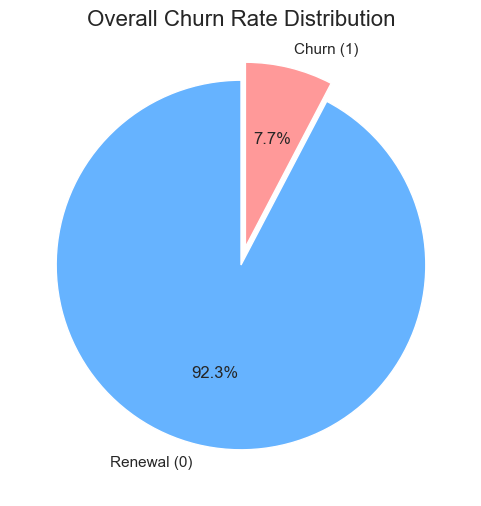

Baseline Churn Rate: 7.68%


In [22]:
# Hitung persentase
churn_counts = train_final['is_churn'].value_counts(normalize=True)
labels = ['Renewal (0)', 'Churn (1)']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Overall Churn Rate Distribution', fontsize=16)
plt.show()

print(f"Baseline Churn Rate: {train_final['is_churn'].mean():.2%}")

### Churn by Key Dimensions

1. Churn VS Tenure

D:\Users\netra\AppData\Local\Temp\ipykernel_15852\3199492954.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='tenure_group', y='is_churn', data=train_final, order=order_tenure, palette='magma', errorbar=None)


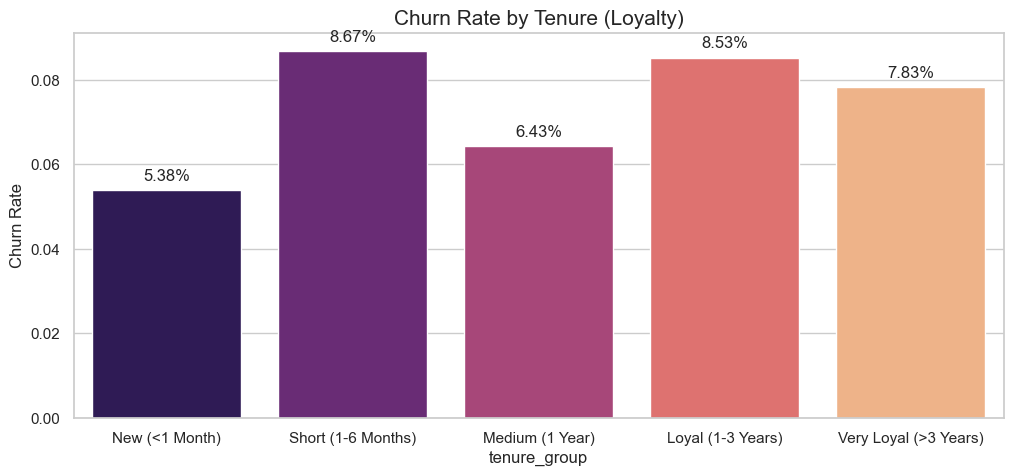

In [23]:
# Buat kategori Tenure (dalam tahun)
def categorize_tenure(days):
    if days <= 30: return 'New (<1 Month)'
    elif days <= 180: return 'Short (1-6 Months)'
    elif days <= 365: return 'Medium (1 Year)'
    elif days <= 1095: return 'Loyal (1-3 Years)'
    else: return 'Very Loyal (>3 Years)'

train_final['tenure_group'] = train_final['tenure'].apply(categorize_tenure)

# Order plot
order_tenure = ['New (<1 Month)', 'Short (1-6 Months)', 'Medium (1 Year)', 'Loyal (1-3 Years)', 'Very Loyal (>3 Years)']

# Plot
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='tenure_group', y='is_churn', data=train_final, order=order_tenure, palette='magma', errorbar=None)
plt.title('Churn Rate by Tenure (Loyalty)', fontsize=15)
plt.ylabel('Churn Rate')

# Labeling
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The analysis of churn rate across different tenure groups reveals a **non-linear relationship between customer loyalty and churn risk**, highlighting critical transition periods in the customer lifecycle.

**Key insights:**

- **New users (< 1 month) exhibit the lowest churn rate (5.38%)**  
  This suggests that customers are still within an onboarding or trial phase, where initial curiosity and promotional incentives may temporarily suppress churn behavior.

- **The highest churn rate occurs among short-tenure users (1–6 months) at 8.67%**  
  This period represents a critical evaluation phase, where users decide whether the service provides sufficient long-term value. Failure to establish strong usage habits or perceived value during this stage significantly increases churn risk.

- **Medium-tenure users (~1 year) show a noticeable decline in churn (6.43%)**  
  Customers who remain active beyond the early months tend to develop usage routines, indicating growing engagement and satisfaction with the service.

- **Churn increases again among loyal users (1–3 years) at 8.53%**  
  This suggests the presence of **subscription fatigue or unmet evolving needs**, where long-term users may reassess their subscription due to changing preferences, competitive alternatives, or price sensitivity.

- **Very loyal users (> 3 years) maintain a relatively lower churn rate (7.83%)**, though still higher than early-stage users  
  While these users demonstrate strong historical loyalty, churn risk remains non-negligible, emphasizing the importance of continuous value reinforcement even for long-tenure customers.

---
### Strategic Implications

- **Early-stage retention (1–6 months):**  
  Focus on onboarding optimization, habit formation, and personalized content recommendations to help users quickly realize core product value.

- **Mid-to-long-term retention (1–3 years):**  
  Implement loyalty programs, feature refreshes, and targeted re-engagement campaigns to address subscription fatigue and reinforce perceived value.

- **Long-tenure customers (> 3 years):**  
  Maintain engagement through exclusive benefits and recognition-based incentives to prevent complacency-driven churn.

Overall, tenure-based segmentation provides a clear framework for **timing-specific retention interventions**, enabling the business to proactively reduce churn across the entire customer lifecycle.

2. Churn vs Payment Method

D:\Users\netra\AppData\Local\Temp\ipykernel_15852\1545908508.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='is_churn', data=plot_data, palette='viridis', errorbar=None)


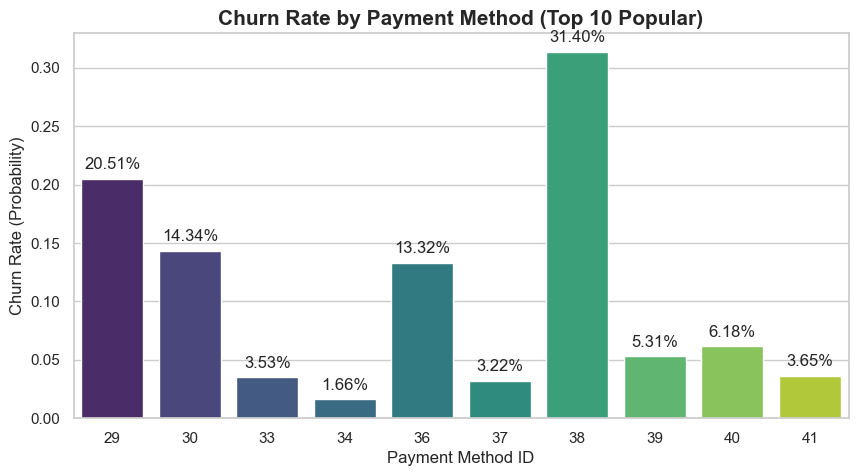

In [24]:
# Kita ambil Top 10 metode pembayaran terpopuler saja agar grafik terbaca
plot_churn_rate(train_final, 'favorite_payment_method', 
               'Churn Rate by Payment Method (Top 10 Popular)', 
               'Payment Method ID', top_n=10)

### Churn vs Payment Method

The analysis of churn rate by payment method reveals **substantial variation in churn risk across different payment channels**, indicating that payment behavior is a critical driver of customer retention.

**Key insights:**

- **Payment Method 38 exhibits an exceptionally high churn rate (31.40%)**, making it the most critical risk channel among the top 10 most-used payment methods.  
  This suggests significant **payment friction**, potential renewal failures, or a user segment that is inherently more price-sensitive or less committed.

- **Payment Methods 29 (20.51%) and 30 (14.34%) also show elevated churn rates**, well above the overall churn average.  
  These methods may be associated with less reliable payment experiences, limited auto-renewal support, or specific user segments with higher churn propensity.

- **In contrast, Payment Methods 33 (3.53%), 34 (1.66%), and 37 (3.22%) demonstrate notably low churn rates**, indicating more stable and reliable renewal behavior.  
  These payment methods are likely preferred by more committed users or offer smoother auto-renewal and payment processing experiences.

- **Moderate churn rates observed for Payment Methods 36 (13.32%), 39 (5.31%), 40 (6.18%), and 41 (3.65%)** suggest that not all popular payment methods carry the same retention risk, even when adoption levels are similar.

---

### Strategic Implications

- **High-risk payment methods (e.g., Method 38, 29, 30):**  
  - Investigate technical issues such as payment failure rates and auto-renewal reliability  
  - Consider proactive reminders or backup payment options before renewal dates  
  - Evaluate whether these methods disproportionately attract price-sensitive users

- **Low-risk payment methods (e.g., Method 33, 34, 37):**  
  - Encourage adoption through default recommendations or incentives  
  - Treat users on these methods as more stable segments for upsell or long-term plans

- **Retention targeting:**  
  Payment method–based segmentation can be integrated into churn prediction models and retention strategies to prioritize interventions where payment friction is most likely to drive churn.

Overall, optimizing payment experience and steering users toward more stable payment methods represents a **direct and actionable opportunity to reduce churn**.


3. Churn vs Discount

D:\Users\netra\AppData\Local\Temp\ipykernel_15852\1545908508.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='is_churn', data=plot_data, palette='viridis', errorbar=None)


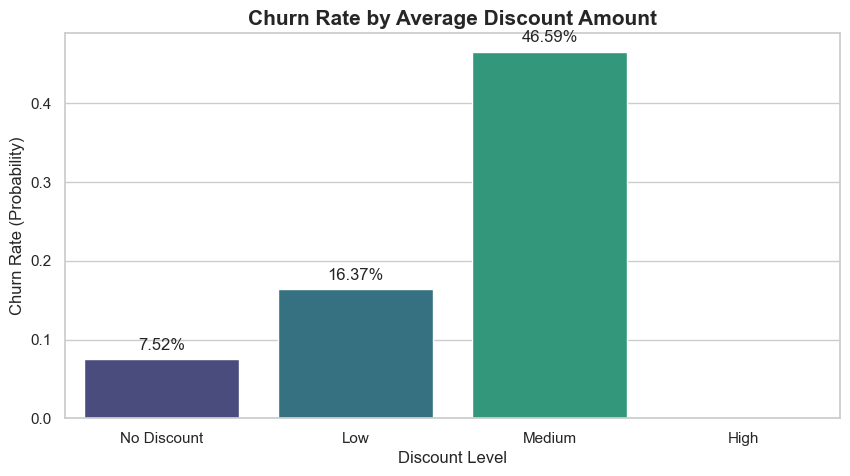

In [25]:
# Kita binning diskon menjadi kategori
# Asumsi: avg_discount_amount sudah dihitung sebelumnya
train_final['discount_group'] = pd.cut(train_final['avg_discount_amount'], 
                                       bins=[-1, 0, 50, 200, 10000], 
                                       labels=['No Discount', 'Low', 'Medium', 'High'])

plot_churn_rate(train_final, 'discount_group', 
               'Churn Rate by Average Discount Amount', 
               'Discount Level')

### Churn vs Discount Level

The analysis of churn rate across discount levels reveals a **strong and counterintuitive relationship between discount usage and churn risk**, challenging the assumption that higher discounts necessarily improve retention.

**Key insights:**

- **Users with no discounts show the lowest churn rate (7.52%)**, indicating that customers who are willing to pay full price tend to be more committed and derive sufficient intrinsic value from the service.

- **Low discount users exhibit a noticeably higher churn rate (16.37%)**, suggesting that even moderate reliance on discounts may be associated with weaker loyalty or early-stage experimentation.

- **Medium discount users experience an exceptionally high churn rate (46.59%)**, making this group the most vulnerable segment in the analysis.  
  This indicates that users who frequently receive moderate discounts are often **price-sensitive and promotion-driven**, rather than genuinely loyal.

- **High discount users are absent or negligible in this sample**, likely due to limited availability or targeted usage of deep discounts, which may be reserved for specific campaigns or edge cases.

---

### Strategic Implications

- **Avoid broad, recurring discount strategies** as a default retention approach, particularly for users already exhibiting low engagement.
- **Shift from price-based incentives to behavior-based incentives**, such as personalized content, exclusive features, or usage-driven rewards.
- **Use discounts selectively and conditionally**, targeting users with high engagement but temporary churn risk rather than chronic price-sensitive segments.
- **Flag medium-discount users as high-risk** in churn prediction models and prioritize alternative retention interventions.

Overall, discount usage is a powerful indicator of churn risk and should be treated as a **risk signal rather than a loyalty signal** in retention strategy design.


3. Churn vs City

D:\Users\netra\AppData\Local\Temp\ipykernel_15852\1545908508.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='is_churn', data=plot_data, palette='viridis', errorbar=None)


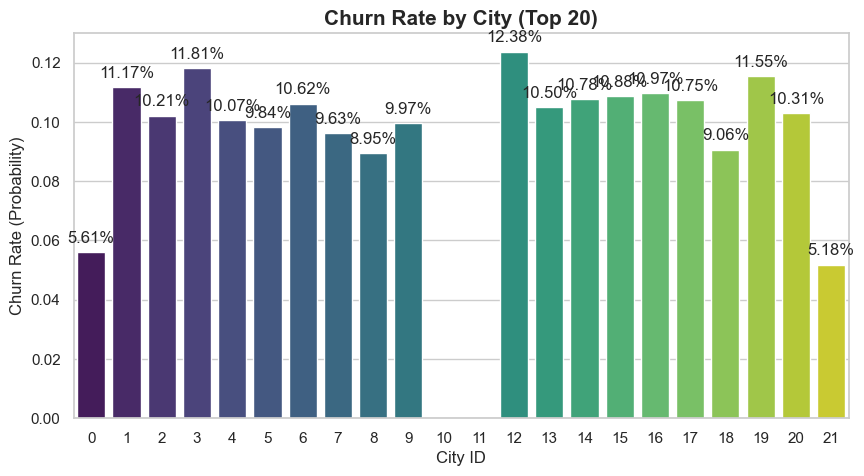

In [26]:
# Kita ambil Top 15 Kota
plot_churn_rate(train_final, 'city', 
               'Churn Rate by City (Top 20)', 
               'City ID', top_n=20)

### Churn Rate vs City (Top 20 Cities)

The analysis of churn rates across the top 15 cities reveals **meaningful geographic variation in customer retention**, indicating that churn behavior is not uniform across regions.

**Key insights:**

- **Churn rates vary substantially by city**, ranging from approximately **5–6%** in the lowest-churn cities to **over 12%** in the highest-churn cities.  
  This spread suggests that regional factors play a measurable role in customer retention outcomes.

- **City 6 and City 0 exhibit the lowest churn rates (5.18% and 5.61%)**, indicating stronger customer stability in these regions.  
  These cities may benefit from better product–market fit, higher engagement, or more reliable payment and network infrastructure.

- **City 16 shows the highest churn rate (12.38%)**, followed closely by Cities 7, 3, and 1, all with churn rates above 11%.  
  These regions represent concentrated churn risk and should be prioritized for deeper investigation.

- **Most cities cluster around a churn rate of 9–11%**, suggesting a baseline retention level, with certain cities deviating significantly from this norm.

---

### Strategic Implications

- **High-churn cities (e.g., City 16, 7, 3):**  
  - Conduct localized diagnostics on payment methods, discount usage, and engagement trends  
  - Deploy region-specific retention campaigns or pricing experiments  
  - Consider partnerships or localized content to improve relevance

- **Low-churn cities (e.g., City 6, City 0):**  
  - Analyze best practices and behavioral patterns that can be replicated in other regions  
  - Target these regions for upsell or longer-term subscription plans

- **Retention optimization:**  
  Incorporating city-level features into churn prediction models enables **geographically targeted interventions**, improving the efficiency of retention efforts.

Overall, geographic segmentation provides a practical lever for **localizing retention strategies and maximizing their impact**.


4. Churn vs Activity Trend

D:\Users\netra\AppData\Local\Temp\ipykernel_15852\1545908508.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='is_churn', data=plot_data, palette='viridis', errorbar=None)


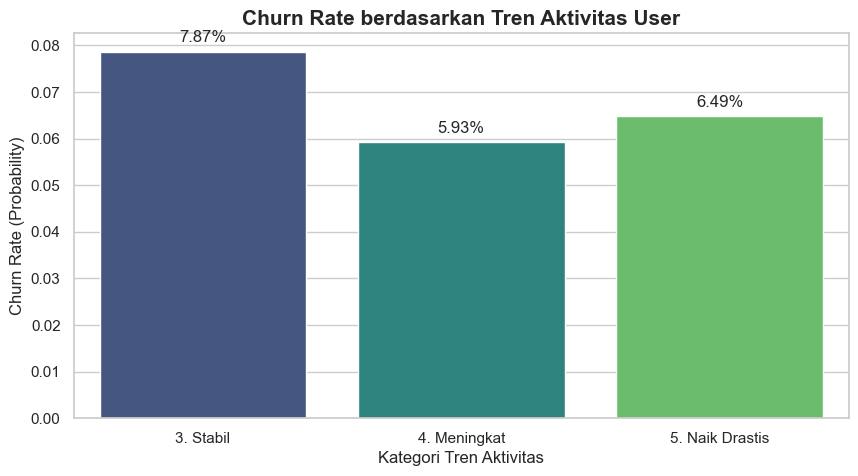

In [27]:
# Buat Kategori Trend
def categorize_trend(value):
    if value < -1000:
        return '1. Turun Drastis'
    elif value < -100:
        return '2. Menurun'
    elif value <= 100:
        return '3. Stabil'
    elif value > 1000:
        return '5. Naik Drastis'
    else:
        return '4. Meningkat'

# Terapkan fungsi ke kolom baru
train_final['trend_category'] = train_final['activity_trend'].apply(categorize_trend)

# Plot Churn Rate
plot_churn_rate(train_final, 'trend_category', 
               'Churn Rate berdasarkan Tren Aktivitas User', 
               'Kategori Tren Aktivitas', top_n=5)

### Churn vs User Activity Trend

The analysis of churn rate by user activity trend highlights the **critical role of engagement momentum**, rather than absolute usage volume, in predicting customer churn.

**Key insights:**

- **Users with stable activity levels show the highest churn rate (7.87%)** among the observed groups.  
  This suggests that maintaining a constant level of engagement may not be sufficient to sustain long-term retention, especially if the usage level does not deepen over time.

- **Users with increasing activity exhibit the lowest churn rate (5.93%)**, indicating that positive engagement momentum strongly correlates with continued subscription renewal.  
  Growth in usage reflects increasing perceived value and habit formation.

- **Users experiencing a sharp increase in activity still demonstrate relatively low churn (6.49%)**, though slightly higher than the steadily increasing group.  
  This may indicate short-term spikes driven by promotions or temporary interest, which do not always translate into sustained loyalty.

---

### Strategic Implications

- **Prioritize users with declining or flat engagement trends** for early intervention, even if their absolute usage appears acceptable.
- **Encourage progressive engagement** through personalized recommendations, feature discovery, and usage-based nudges.
- **Differentiate retention tactics** between users with organic growth in activity and those exhibiting short-lived spikes.

Incorporating activity trend features into churn prediction models enables the business to **identify early warning signals** and intervene before churn behavior fully materializes.

Overall, engagement momentum serves as a **leading indicator of customer retention**, reinforcing its importance in churn analysis and retention strategy design.


## Statistical Analysis

### Categorical Variables

1. Chi-Square Test

In [28]:
import pandas as pd
import scipy.stats as stats

def run_chi_square(df, col_name, target='is_churn'):
    # Buat Contingency Table
    crosstab = pd.crosstab(df[col_name], df[target])
    
    # Chi-Square Test
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    
    print(f"--- Analisis Chi-Square: {col_name} ---")
    print(f"P-Value: {p:.5f}")
    if p < 0.05:
        print("Hasil: SIGNIFIKAN. Variabel ini mempengaruhi Churn.")
    else:
        print("Hasil: TIDAK SIGNIFIKAN. Variabel ini tidak berpengaruh pada Churn.")
    print("-" * 30)

# Metode Pembayaran
if 'payment_method_name' in train_final.columns:
    run_chi_square(train_final, 'payment_method_name')
else:
    # Fallback ke ID jika nama belum dibuat
    run_chi_square(train_final, 'favorite_payment_method')

# Penggunaan Diskon (Discount Usage - Yes/No)
# Jika kolom 'is_discounted' belum ada, buat dulu
if 'is_discounted' not in train_final.columns:
    train_final['is_discounted'] = (train_final['avg_discount_amount'] > 0).astype(int)
run_chi_square(train_final, 'is_discounted')

# Wilayah (City)
run_chi_square(train_final, 'city')

# Gender
if 'gender' in train_final.columns:
    run_chi_square(train_final, 'gender')

--- Analisis Chi-Square: favorite_payment_method ---
P-Value: 0.00000
Hasil: SIGNIFIKAN. Variabel ini mempengaruhi Churn.
------------------------------
--- Analisis Chi-Square: is_discounted ---
P-Value: 0.00000
Hasil: SIGNIFIKAN. Variabel ini mempengaruhi Churn.
------------------------------
--- Analisis Chi-Square: city ---
P-Value: 0.00000
Hasil: SIGNIFIKAN. Variabel ini mempengaruhi Churn.
------------------------------
--- Analisis Chi-Square: gender ---
P-Value: 0.00000
Hasil: SIGNIFIKAN. Variabel ini mempengaruhi Churn.
------------------------------


### Numerical Variables

1. Distribution Comparison (KDE Plot)

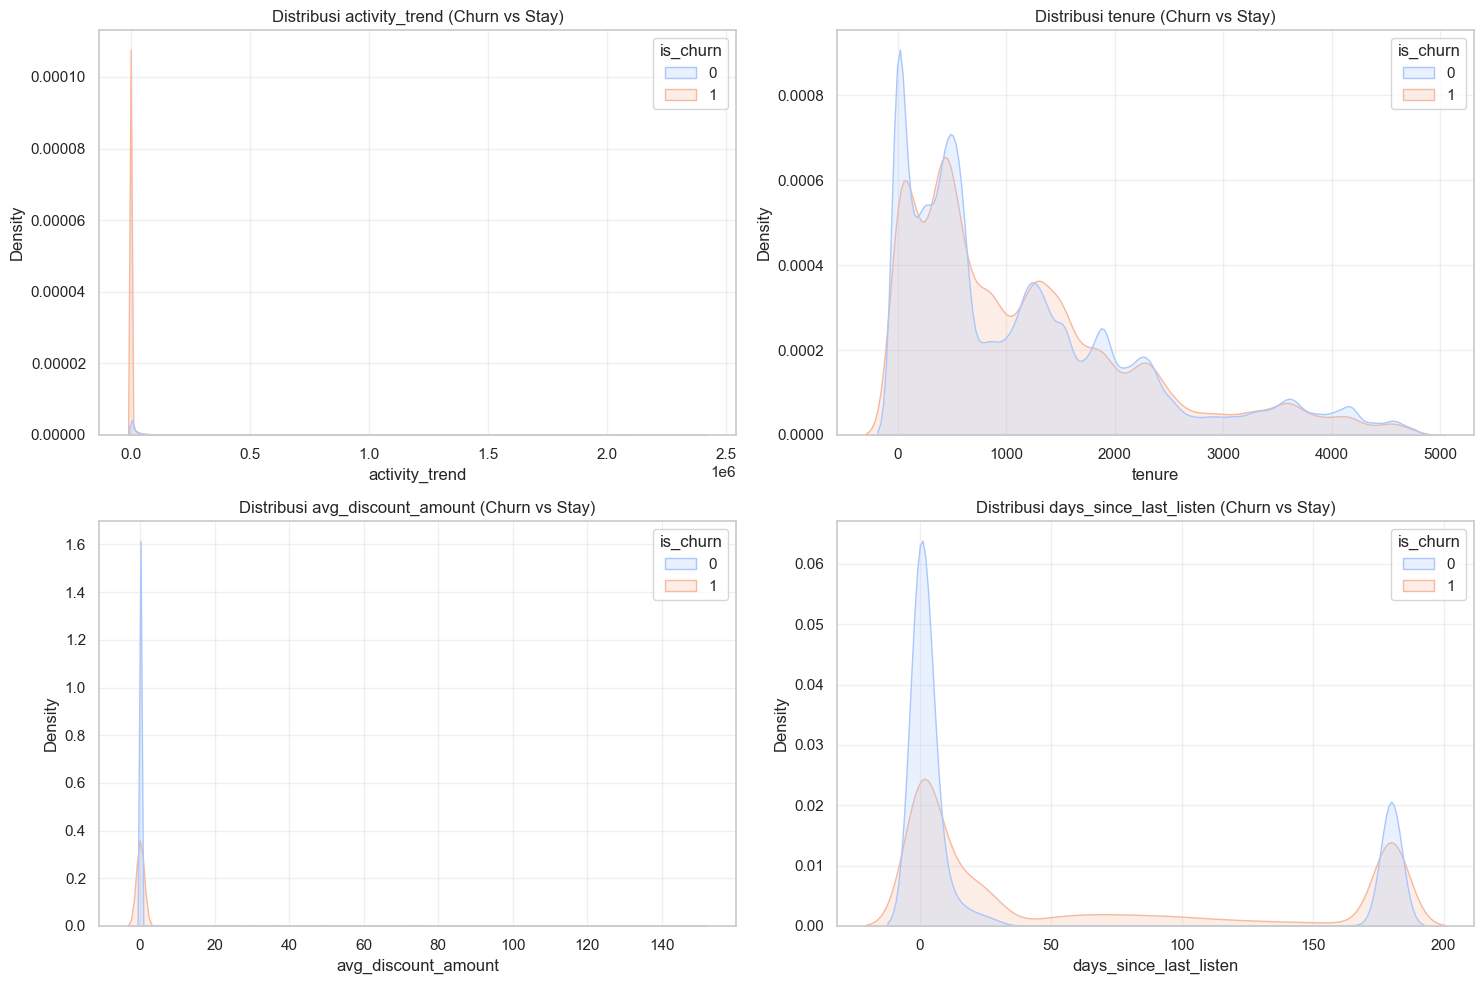

In [29]:
# Pilih variabel numerik utama
num_cols = ['activity_trend', 'tenure', 'avg_discount_amount', 'days_since_last_listen']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    if col in train_final.columns:
        plt.subplot(2, 2, i+1)
        # Plot distribusi
        sns.kdeplot(data=train_final, x=col, hue='is_churn', fill=True, common_norm=False, palette='coolwarm')
        plt.title(f'Distribusi {col} (Churn vs Stay)')
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2. Univariate Logistic Regression

In [30]:
def run_univariate_logit(df, feature, target='is_churn'):
    # Bersihkan NaN untuk perhitungan
    temp_df = df[[feature, target]].dropna()
    
    X = temp_df[feature]
    y = temp_df[target]
    
    # Tambahkan konstanta agar model valid
    X = sm.add_constant(X)
    
    try:
        model = sm.Logit(y, X).fit(disp=0) # disp=0 agar tidak print log proses
        print(f"\n=== Logistic Regression: {feature} ===")
        print(model.summary().tables[1]) # Tampilkan tabel koefisien
    except Exception as e:
        print(f"Error pada {feature}: {e}")

# Jalankan variabel kunci
numerical_features = ['activity_trend', 'tenure', 'avg_discount_amount', 'num_payment_methods']

print("Menganalisis Pengaruh Numerik terhadap Churn...")
for col in numerical_features:
    if col in train_final.columns:
        run_univariate_logit(train_final, col)

Menganalisis Pengaruh Numerik terhadap Churn...

=== Logistic Regression: activity_trend ===
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.4890      0.003   -919.609      0.000      -2.494      -2.484
activity_trend  4.094e-07   6.82e-08      6.003      0.000    2.76e-07    5.43e-07

=== Logistic Regression: tenure ===
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5014      0.004   -645.817      0.000      -2.509      -2.494
tenure      1.257e-05    2.4e-06      5.234      0.000    7.86e-06    1.73e-05

=== Logistic Regression: avg_discount_amount ===
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

## Key Driver Analysis

## Churn Prediction Model

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DATA CLEANING & SELECTION
# Buang kolom identitas dan target dari fitur (X)
# Gunakan select_dtypes untuk HANYA mengambil angka (mencegah error Timestamp/String)
X = train_final.drop(columns=['is_churn', 'msno'], errors='ignore')
X = X.select_dtypes(include=['number']) 

# Bersihkan Infinite values (jika ada pembagian nol) dan NaN
X = X.replace([np.inf, -np.inf], 0).fillna(0)

# Target
y = train_final['is_churn']

print(f"Fitur yang digunakan ({X.shape[1]} kolom):")
print(X.columns.tolist())

Fitur yang digunakan (15 kolom):
['bd', 'tenure', 'total_renewals', 'avg_plan_duration', 'avg_discount_amount', 'discount_frequency', 'num_payment_methods', 'favorite_payment_method', 'total_listening_days', 'total_secs_accumulated', 'recent_secs', 'previous_secs', 'activity_trend', 'days_since_last_listen', 'is_discounted']


### Train-Test Split

In [35]:
# STRATIFIED SPLIT
# Stratify=y penting agar proporsi Churn di Training dan Testing sama persis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nJumlah Data Train: {len(X_train)} | Test: {len(X_test)}")


Jumlah Data Train: 1571112 | Test: 392779


### Baseline Model

In [37]:
# Scaling (Standarisasi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
# class_weight='balanced' membantu model memperhatikan kelas minoritas (Churn)
log_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1] # Ambil probabilitas kelas 1

# Cek ROC-AUC Singkat
print("Baseline (LogReg) ROC-AUC:", roc_auc_score(y_test, y_prob_log))

Baseline (LogReg) ROC-AUC: 0.8302947341523221


### Advanced Model

1. Random Forest

In [38]:
# Train Model
# n_jobs=-1 menggunakan semua core CPU
rf_model = RandomForestClassifier(n_estimators=150, 
                                  max_depth=12, 
                                  random_state=42, 
                                  class_weight='balanced',
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prediksi Probabilitas
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Advanced (Random Forest) ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Advanced (Random Forest) ROC-AUC: 0.9159027542649623


## Model Evaluation & Threshold Adjustment


--- Evaluasi pada Threshold: 0.5 ---
ROC-AUC Score : 0.9159
Recall (Churn) : 0.7661
Precision      : 0.4101


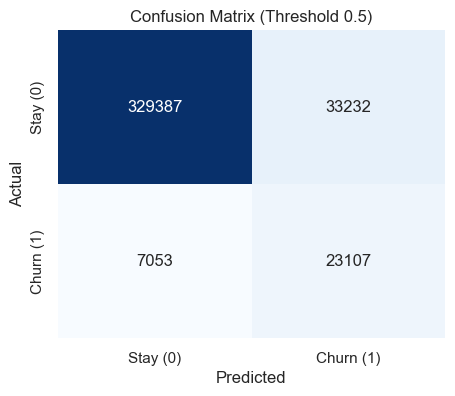

INTERPRETASI:
True Positive: 23107 user (Akan kita beri promo win-back)
False Negative: 7053 user (User ini Churn tanpa kita sadari - Bahaya!)
False Positive: 33232 user (User setia tapi kita beri promo - Biaya marketing terbuang)

--- Evaluasi pada Threshold: 0.35 ---
ROC-AUC Score : 0.9159
Recall (Churn) : 0.8519
Precision      : 0.2740


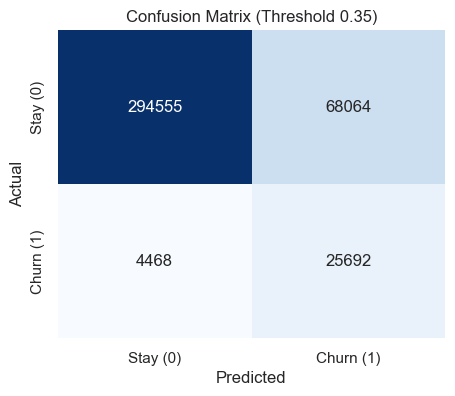

INTERPRETASI:
True Positive: 25692 user (Akan kita beri promo win-back)
False Negative: 4468 user (User ini Churn tanpa kita sadari - Bahaya!)
False Positive: 68064 user (User setia tapi kita beri promo - Biaya marketing terbuang)


In [46]:
def evaluate_threshold(y_true, y_probs, threshold):
    # Buat prediksi baru berdasarkan threshold kustom
    y_pred_adj = (y_probs >= threshold).astype(int)
    
    print(f"\n--- Evaluasi pada Threshold: {threshold} ---")
    print(f"ROC-AUC Score : {roc_auc_score(y_true, y_probs):.4f}")
    print(f"Recall (Churn) : {recall_score(y_true, y_pred_adj):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred_adj):.4f}")
    
    # Visualisasi Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_adj)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Stay (0)', 'Churn (1)'],
                yticklabels=['Stay (0)', 'Churn (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold {threshold})')
    plt.show()
    
    # Interpretasi Bisnis
    tn, fp, fn, tp = cm.ravel()
    print(f"INTERPRETASI:")
    print(f"True Positive: {tp} user (Akan kita beri promo win-back)")
    print(f"False Negative: {fn} user (User ini Churn tanpa kita sadari - Bahaya!)")
    print(f"False Positive: {fp} user (User setia tapi kita beri promo - Biaya marketing terbuang)")

# BANDINGKAN HASIL

#  Default (0.5)
# Biasanya Recall rendah, banyak Churner yang lolos
evaluate_threshold(y_test, y_prob_rf, threshold=0.5)

# Adjustment (0.3 atau 0.4)
# Kita turunkan batasnya agar lebih sensitif menangkap Churner
evaluate_threshold(y_test, y_prob_rf, threshold=0.35)